## Welcome to the `Efficient Self-Attention` Workshop!

In this workshop, we'll learn about Self-attention mechanism via an example 

In [ ]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# basic imports
import os
import numpy as np
import matplotlib.pyplot as plt

# matrix manipulations
from einops import rearrange
from scipy.special import softmax
np.set_printoptions(precision=3)

## Attention mechanism
- Attention mechanism involves 3 components - Query, Key and Value
- It is a mapping a query and a set of key-value pairs to an output,
- Output is computed as a weighted sum of the values, where the weight assigned to each value is computed by similarity b/w query and corresponding key

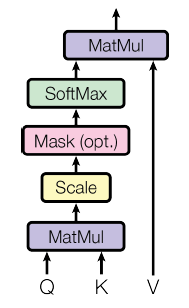

[Image reference](https://arxiv.org/abs/1706.03762)

In [ ]:
# Index to color mapping
id_to_color = np.array([
                        [127, 0, 0],   # red coloour for index 0
                        [0, 127, 0],   # green colour for index 1
                        [0, 0, 127]    # blue colour for index 1
                    ])

# Sample Query Matrix values
query_indices = np.array([
                    [0,0,0,1,1,1,2,2,2],
                    [0,0,0,1,1,1,2,2,2],
                    [0,0,0,1,1,1,2,2,2],
                    [1,1,1,0,0,0,1,1,1],
                    [1,1,1,0,0,0,1,1,1],
                    [1,1,1,0,0,0,1,1,1],
                    [2,2,2,1,1,1,0,0,0],
                    [2,2,2,1,1,1,0,0,0],
                    [2,2,2,1,1,1,0,0,0]       
            ])

# Sample Key Matrix values
key_indices = np.array([
                        [0,0,0],
                        [1,1,1],
                        [2,2,2]
                ])

value_indices = np.array([
                        [2,2,2],
                        [0,0,0],
                        [1,1,1],    
                ])

q = rearrange(id_to_color[query_indices], 'h w c -> (h w) c')
k = rearrange(id_to_color[key_indices], 'h w c -> (h w) c')
v = rearrange(id_to_color[value_indices], 'h w c -> (h w) c')

print("q.shape = ", q.shape)
print("k.shape = ", k.shape)
print("v.shape = ", v.shape)

q.shape =  (81, 3)
k.shape =  (9, 3)
v.shape =  (9, 3)


## Visualize Query, Key and Value

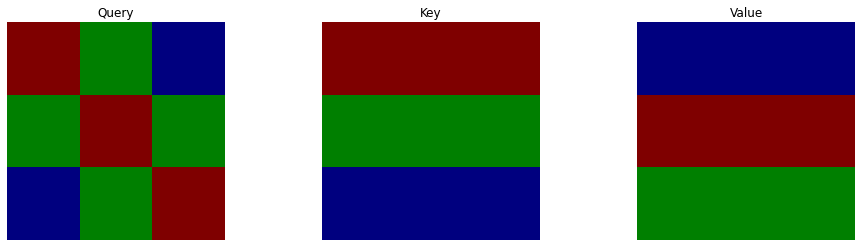

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (16,4))
axes[0].imshow(q.reshape(9,9,-1))
axes[0].set_title("Query")
axes[0].axis('off')
axes[1].imshow(k.reshape(3,3,-1))
axes[1].set_title("Key")
axes[1].axis('off')
axes[2].imshow(v.reshape(3,3,-1))
axes[2].set_title("Value")
axes[2].axis('off');

In practical situations, 
- Query can be an embedded version of image representing dense feature map
- Key can represent the identification vector analagous to pixel location in image.
- Value can represent characteristics like Depth at the location, class of object for the key, speed etc

## Calculating Attention

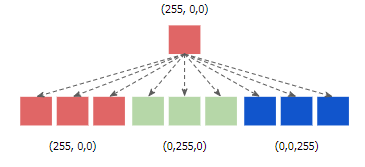

In [ ]:
## Consider the first pixel in Query
q0 = q[0]
print("Reference Query = ", q0)

# Attention is dot product of query and Key
attention0 = q0.reshape(1,3) @ k.T
attention0 = softmax(attention0)
print("Attention for 1st element : ", attention0)

Reference Query =  [127   0   0]
Attention for 1st element :  [[0.333 0.333 0.333 0.    0.    0.    0.    0.    0.   ]]


- For 1st element, the query is red pixel and hence gives equal weight to key where it's same. 
- **Softmax ensures sum of attention is 1**

## Calculating output

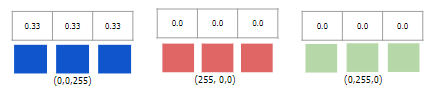

In [ ]:
x0 = attention0.reshape(1,9) @ v
print("Output for 0th element : ", x0)

Output for 0th element :  [[  0.   0. 127.]]


## Vectorized version

In [ ]:
attention = q @ k.transpose()
attention = softmax(attention, axis=1)
print("Attention shape = ", attention.shape)
x = attention @ v
print("Output shape = ", x.shape)

Attention shape =  (81, 9)
Output shape =  (81, 3)


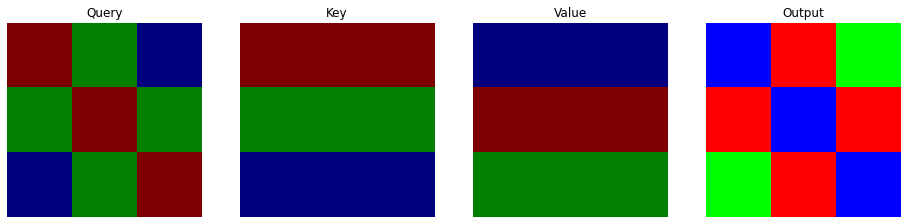

In [ ]:
fig, axes = plt.subplots(1, 4, figsize = (16,4))
axes[0].imshow(q.reshape(9,9,-1))
axes[0].set_title("Query")
axes[0].axis('off')
axes[1].imshow(k.reshape(3,3,-1))
axes[1].set_title("Key")
axes[1].axis('off')
axes[2].imshow(v.reshape(3,3,-1))
axes[2].set_title("Value")
axes[2].axis('off')
axes[3].imshow(x.reshape(9,9,-1))
axes[3].set_title("Output");
axes[3].axis('off');